# 1) Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# 2) Loading Datasets

In [2]:
iot_data = pd.read_csv('iot_telemetry_data.csv')
iot_data

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.590000e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.590000e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.590000e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.590000e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.590000e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000
...,...,...,...,...,...,...,...,...,...
405179,1.600000e+09,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001
405180,1.600000e+09,b8:27:eb:bf:9d:51,0.005882,48.500000,False,0.008660,False,0.023301,22.200000
405181,1.600000e+09,1c:bf:ce:15:ec:4d,0.004540,75.699997,True,0.007181,False,0.019076,26.600000
405182,1.600000e+09,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001


In [3]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ts        405184 non-null  float64
 1   device    405184 non-null  object 
 2   co        405184 non-null  float64
 3   humidity  405184 non-null  float64
 4   light     405184 non-null  bool   
 5   lpg       405184 non-null  float64
 6   motion    405184 non-null  bool   
 7   smoke     405184 non-null  float64
 8   temp      405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 22.4+ MB


# 3) Preprocessing of Data

In [4]:
iot_data.replace(['00:0f:00:70:91:0a', '1c:bf:ce:15:ec:4d', 'b8:27:eb:bf:9d:51'], [1, 2, 3], inplace=True)
print(iot_data.head())

             ts  device        co   humidity  light       lpg  motion  \
0  1.590000e+09       3  0.004956  51.000000  False  0.007651   False   
1  1.590000e+09       1  0.002840  76.000000  False  0.005114   False   
2  1.590000e+09       3  0.004976  50.900000  False  0.007673   False   
3  1.590000e+09       2  0.004403  76.800003   True  0.007023   False   
4  1.590000e+09       3  0.004967  50.900000  False  0.007664   False   

      smoke       temp  
0  0.020411  22.700000  
1  0.013275  19.700001  
2  0.020475  22.600000  
3  0.018628  27.000000  
4  0.020448  22.600000  


In [5]:
iot_data['time_stamp'] = pd.to_datetime(iot_data['ts'], unit='s')
#since in the Time column, a date isn’t specified and hence Pandas will put Some date automatically in that case.
iot_data.drop(columns=['ts'], inplace=True) 
print(iot_data.head())

   device        co   humidity  light       lpg  motion     smoke       temp  \
0       3  0.004956  51.000000  False  0.007651   False  0.020411  22.700000   
1       1  0.002840  76.000000  False  0.005114   False  0.013275  19.700001   
2       3  0.004976  50.900000  False  0.007673   False  0.020475  22.600000   
3       2  0.004403  76.800003   True  0.007023   False  0.018628  27.000000   
4       3  0.004967  50.900000  False  0.007664   False  0.020448  22.600000   

           time_stamp  
0 2020-05-20 18:40:00  
1 2020-05-20 18:40:00  
2 2020-05-20 18:40:00  
3 2020-05-20 18:40:00  
4 2020-05-20 18:40:00  


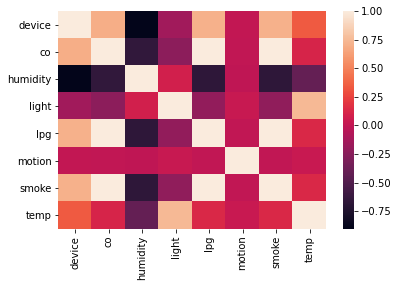

In [6]:
sns.heatmap(iot_data.corr()) 

In [7]:
light = iot_data.iloc[:,3]
print(light.tail(10))
motion = iot_data.iloc[:, 5]
print(motion.head(10))

405174     True
405175    False
405176    False
405177    False
405178     True
405179    False
405180    False
405181     True
405182    False
405183    False
Name: light, dtype: bool
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: motion, dtype: bool


In [8]:
iot_data['motion'].unique

<bound method Series.unique of 0         False
1         False
2         False
3         False
4         False
          ...  
405179    False
405180    False
405181    False
405182    False
405183    False
Name: motion, Length: 405184, dtype: bool>

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder=LabelEncoder()
light = labelencoder.fit_transform(light)
print(light)
motion = labelencoder.fit_transform(motion)
print(motion)
onehotencoder=OneHotEncoder()


[0 0 0 ... 1 0 0]
[0 0 0 ... 0 0 0]


In [10]:
iot_data['light'] = light
iot_data['motion'] = motion
iot_data

,device,co,humidity,light,lpg,motion,smoke,temp,time_stamp
0,3,0.004956,51.000000,0,0.007651,0,0.020411,22.700000,2020-05-20 18:40:00
1,1,0.002840,76.000000,0,0.005114,0,0.013275,19.700001,2020-05-20 18:40:00
2,3,0.004976,50.900000,0,0.007673,0,0.020475,22.600000,2020-05-20 18:40:00
3,2,0.004403,76.800003,1,0.007023,0,0.018628,27.000000,2020-05-20 18:40:00
4,3,0.004967,50.900000,0,0.007664,0,0.020448,22.600000,2020-05-20 18:40:00
...,...,...,...,...,...,...,...,...,...
405179,1,0.003745,75.300003,0,0.006247,0,0.016437,19.200001,2020-09-13 12:26:40
405180,3,0.005882,48.500000,0,0.008660,0,0.023301,22.200000,2020-09-13 12:26:40
405181,2,0.004540,75.699997,1,0.007181,0,0.019076,26.600000,2020-09-13 12:26:40
405182,1,0.003745,75.300003,0,0.006247,0,0.016437,19.200001,2020-09-13 12:26:40


In [11]:
iot_data_df = pd.DataFrame(iot_data)
iot_data_df.head()

,device,co,humidity,light,lpg,motion,smoke,temp,time_stamp
0,3,0.004956,51.000000,0,0.007651,0,0.020411,22.700000,2020-05-20 18:40:00
1,1,0.002840,76.000000,0,0.005114,0,0.013275,19.700001,2020-05-20 18:40:00
2,3,0.004976,50.900000,0,0.007673,0,0.020475,22.600000,2020-05-20 18:40:00
3,2,0.004403,76.800003,1,0.007023,0,0.018628,27.000000,2020-05-20 18:40:00
4,3,0.004967,50.900000,0,0.007664,0,0.020448,22.600000,2020-05-20 18:40:00


In [12]:
iot_data_df.isnull().sum()

device        0
co            0
humidity      0
light         0
lpg           0
motion        0
smoke         0
temp          0
time_stamp    0
dtype: int64

In [13]:
#converting the given temperature in  Fahrenheit to degree Celsius
iot_data_df['temp'] = (iot_data_df['temp'] * 1.8) + 32
iot_data_df

,device,co,humidity,light,lpg,motion,smoke,temp,time_stamp
0,3,0.004956,51.000000,0,0.007651,0,0.020411,72.860000,2020-05-20 18:40:00
1,1,0.002840,76.000000,0,0.005114,0,0.013275,67.460001,2020-05-20 18:40:00
2,3,0.004976,50.900000,0,0.007673,0,0.020475,72.680000,2020-05-20 18:40:00
3,2,0.004403,76.800003,1,0.007023,0,0.018628,80.600000,2020-05-20 18:40:00
4,3,0.004967,50.900000,0,0.007664,0,0.020448,72.680000,2020-05-20 18:40:00
...,...,...,...,...,...,...,...,...,...
405179,1,0.003745,75.300003,0,0.006247,0,0.016437,66.560001,2020-09-13 12:26:40
405180,3,0.005882,48.500000,0,0.008660,0,0.023301,71.960000,2020-09-13 12:26:40
405181,2,0.004540,75.699997,1,0.007181,0,0.019076,79.880001,2020-09-13 12:26:40
405182,1,0.003745,75.300003,0,0.006247,0,0.016437,66.560001,2020-09-13 12:26:40


# 4) Visualization


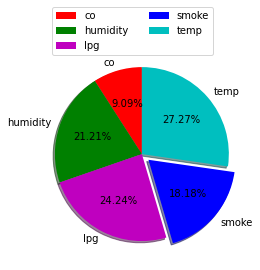

In [14]:
affect=['co', 'humidity', 'lpg', 'smoke', 'temp']
slice=[3,7,8,6,9]
color=['r', 'g', 'm', 'b', 'c']

plt.pie(slice, labels=affect, colors=color, startangle=90,shadow=True, 
       explode=(0,0,0,0.1,0), autopct='%1.2f%%')
plt.legend(bbox_to_anchor =(0.85, 1.20), ncol = 2) 
plt.show()

Text(0.5, 0.98, 'Environmental Sensor IoT')

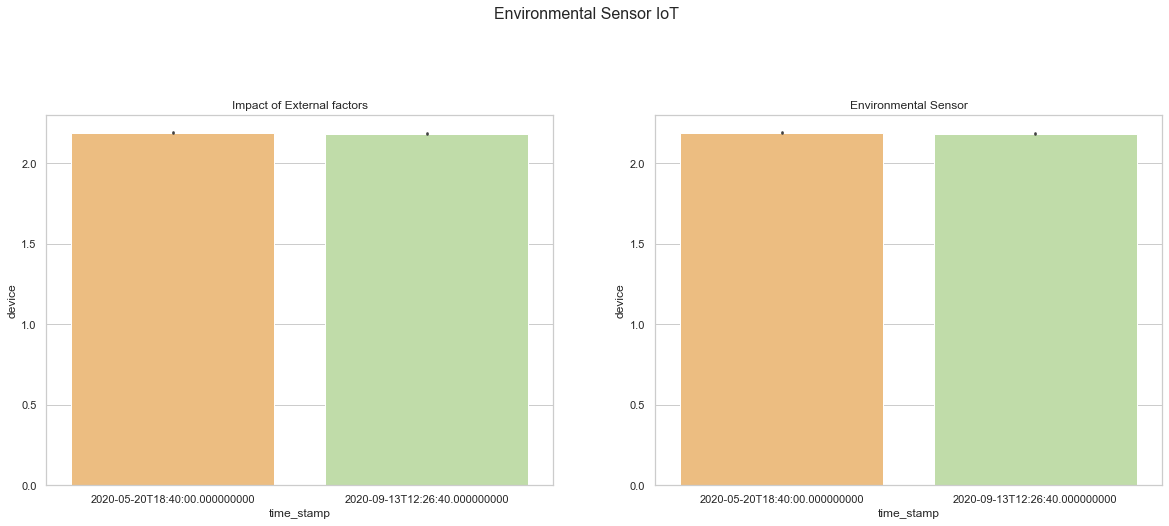

In [15]:
from matplotlib.gridspec import GridSpec
sns.set(style="whitegrid")


plt.figure(2, figsize=(20,15))
the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 1],  title='Environmental Sensor')
sns.barplot(y='device',x='time_stamp', data=iot_data_df, palette='Spectral')
plt.subplot(the_grid[0, 0], title='Impact of External factors')

sns.barplot(y='device',x='time_stamp', data=iot_data_df, palette='Spectral')

plt.suptitle('Environmental Sensor IoT', fontsize=16)

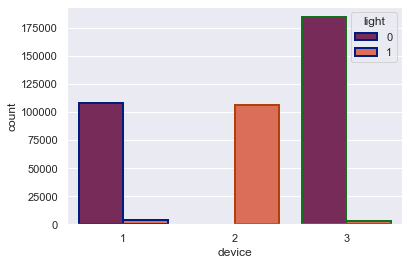

In [16]:
sns.set_style('darkgrid')
sns.countplot('device', hue='light',palette="rocket", edgecolor=sns.color_palette("dark", 3),linewidth=2, data=iot_data_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC01292788>,
      dtype=object)

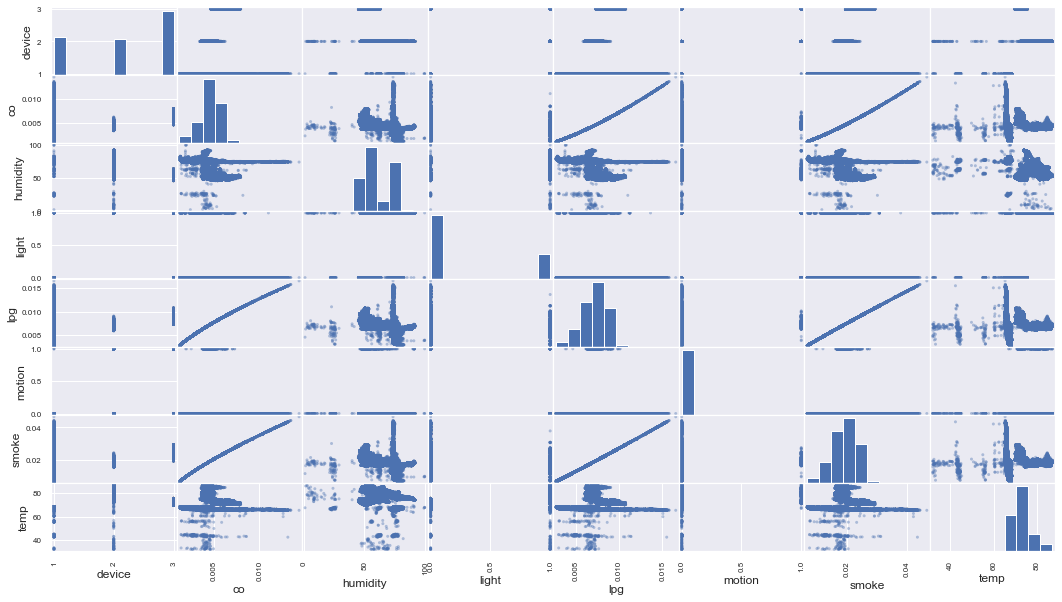

In [17]:
pd.plotting.scatter_matrix(iot_data_df, alpha=0.4, figsize=(18, 10))

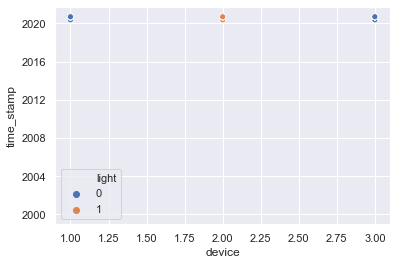

In [18]:
sns.scatterplot('device', 'time_stamp', hue= 'light' , data=iot_data_df)

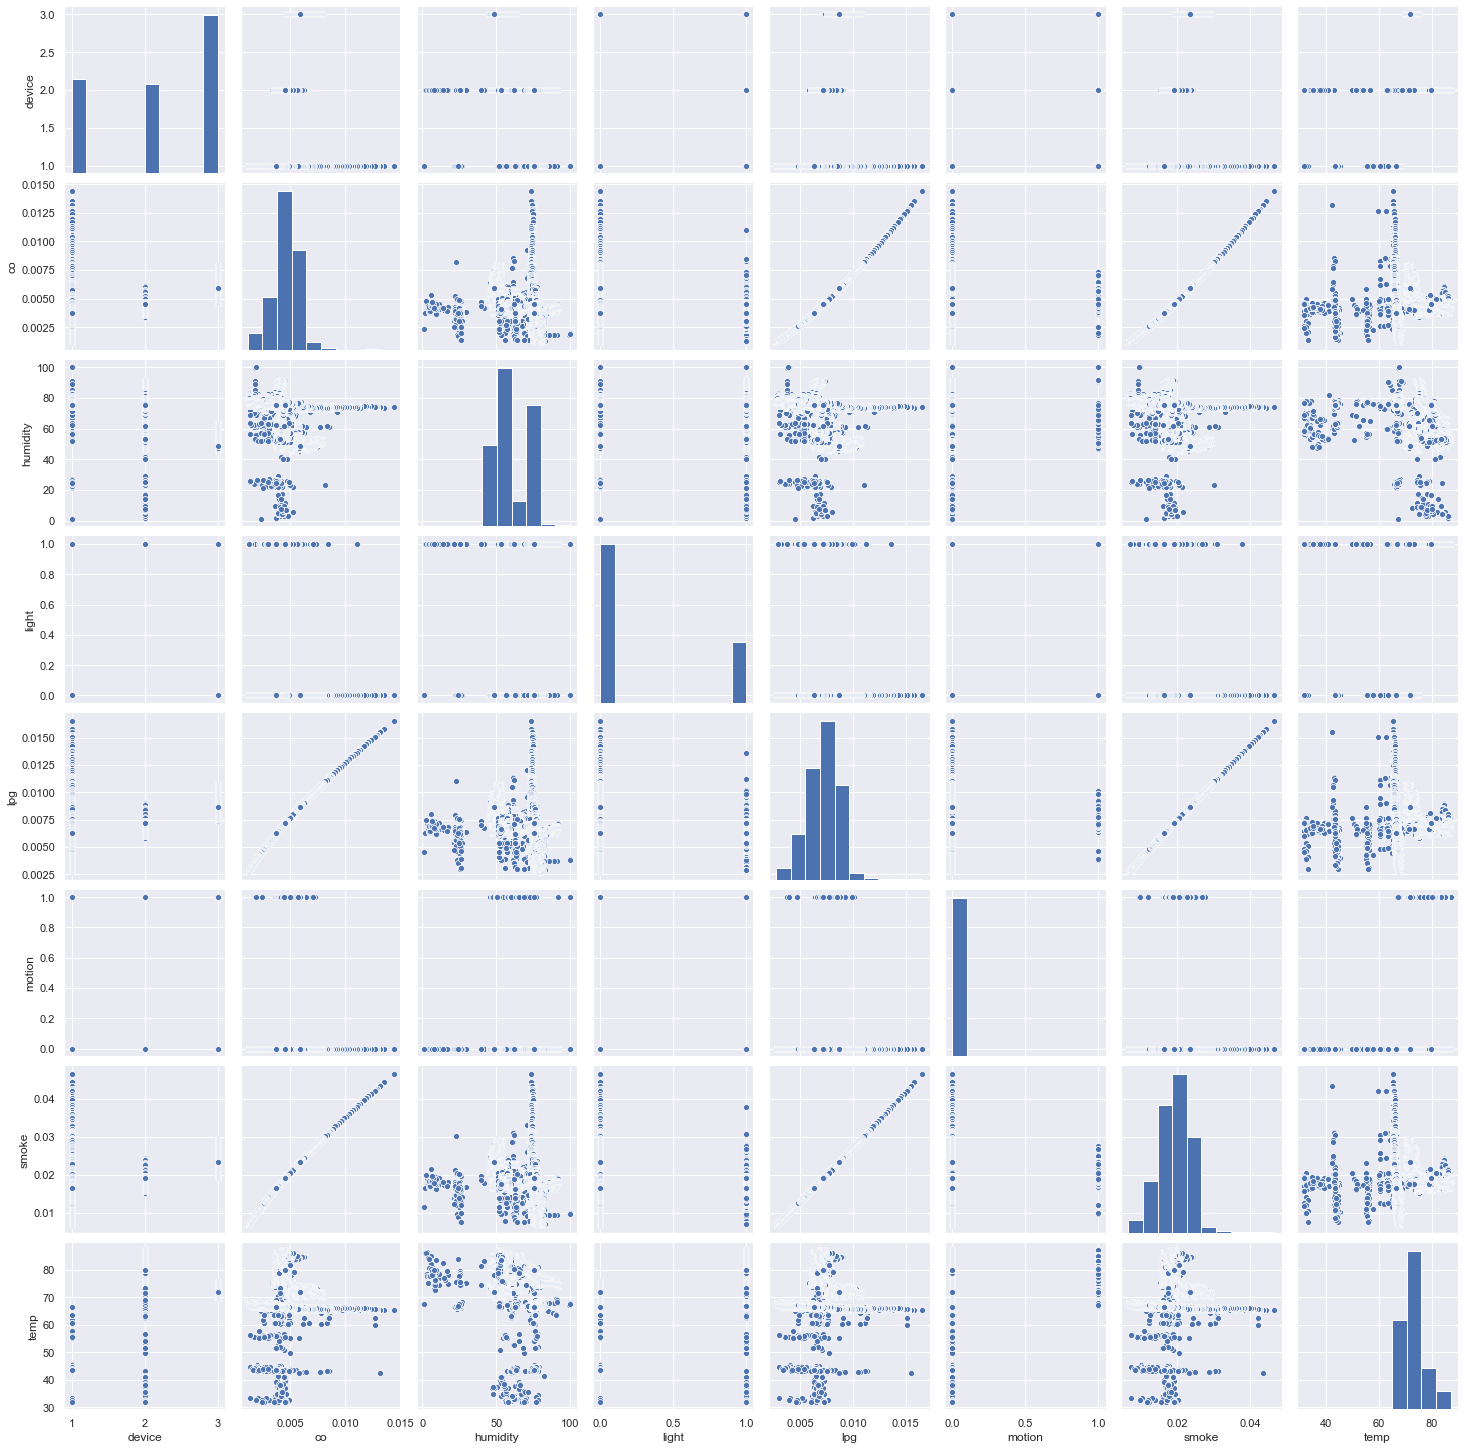

In [19]:
sns.pairplot(iot_data_df)

In [20]:
iot_data_df.drop('time_stamp', axis=1, inplace=True)
iot_data_df.drop('motion', axis=1, inplace=True)
iot_data_df.head()

,device,co,humidity,light,lpg,smoke,temp
0,3,0.004956,51.000000,0,0.007651,0.020411,72.860000
1,1,0.002840,76.000000,0,0.005114,0.013275,67.460001
2,3,0.004976,50.900000,0,0.007673,0.020475,72.680000
3,2,0.004403,76.800003,1,0.007023,0.018628,80.600000
4,3,0.004967,50.900000,0,0.007664,0.020448,72.680000


# 5) Spliting of Data in Train & Test

In [21]:
x = iot_data_df.drop('light', axis= 1)
y = iot_data_df['light'].values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [22]:
x

,device,co,humidity,lpg,smoke,temp
0,3,0.004956,51.000000,0.007651,0.020411,72.860000
1,1,0.002840,76.000000,0.005114,0.013275,67.460001
2,3,0.004976,50.900000,0.007673,0.020475,72.680000
3,2,0.004403,76.800003,0.007023,0.018628,80.600000
4,3,0.004967,50.900000,0.007664,0.020448,72.680000
...,...,...,...,...,...,...
405179,1,0.003745,75.300003,0.006247,0.016437,66.560001
405180,3,0.005882,48.500000,0.008660,0.023301,71.960000
405181,2,0.004540,75.699997,0.007181,0.019076,79.880001
405182,1,0.003745,75.300003,0.006247,0.016437,66.560001


In [23]:
x.shape

(405184, 6)

In [24]:
y.shape

(405184,)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# 6) Training and Predicting

In [26]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [27]:
prediction = reg.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0.5, 12.5, 'Predicted label')

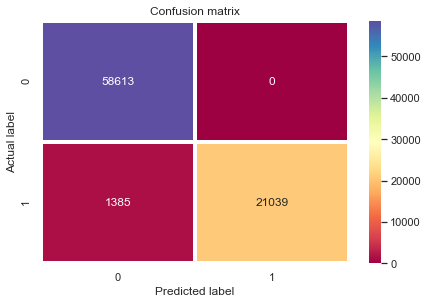

In [28]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cnf_matrix = metrics.confusion_matrix(y_test, prediction)
#cnf_matrix
sns.heatmap(cnf_matrix, annot=True, cmap="Spectral" ,fmt='g', linewidth = 3)
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

Accuracy: 0.9829090415489221
Precision: 1.0
Recall: 0.9382358187656082
